In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# 2. Load Dataset
df = pd.read_csv("C:/Users/tusha/Downloads/Marketing_ABtest.csv")

In [3]:
# 3. Basic structure
print("First 5 rows:\n", df.head())
print("\nColumn names:\n", df.columns)
print("\nData types:\n", df.dtypes)

First 5 rows:
    Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  

Column names:
 Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

Data types:
 Unnamed: 0        int64
user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object


In [4]:
# 4. Missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


In [5]:
# 5. Unique values per column
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique values per column:
Unnamed: 0: 588101
user id: 588101
test group: 2
converted: 2
total ads: 807
most ads day: 7
most ads hour: 24


In [6]:
# 6. Basic Counts

# How many people in each group
print(df['test group'].value_counts())

# Conversion rate = conversions / total users
conversion_rates = df.groupby('test group')['converted'].mean()
print("\nConversion rates:")
print(conversion_rates)

ad     564577
psa     23524
Name: test group, dtype: int64

Conversion rates:
test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


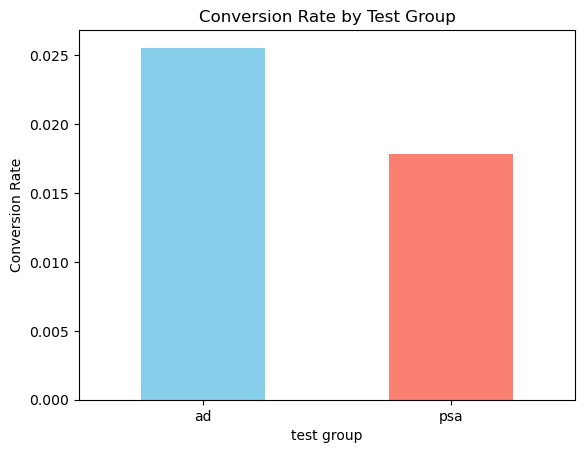

In [7]:
# 7. Visualize conversion rate

conversion_rates.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.show()

In [8]:
# 8. Summary by Group
summary = df.groupby("test group")["converted"].agg(["mean", "count", "sum"]).reset_index()
print("\nConversion Summary by group:\n", summary)

summary = df.groupby("test group")["converted"].agg(["count", "sum", "mean"]).reset_index()
summary.columns = ["test group", "Sample Size", "Conversions", "Conversion Rate"]


Conversion Summary by group:
   test group      mean   count    sum
0         ad  0.025547  564577  14423
1        psa  0.017854   23524    420


In [14]:
# 9. Relative Lift of 'ad' over 'psa'
# Extract conversion rates
P_control = summary.loc[summary["test group"] == "psa", "Conversion Rate"].values[0]
P_variant = summary.loc[summary["test group"] == "ad", "Conversion Rate"].values[0]

# Calculate relative lift
lift = (P_variant - P_control) / P_control

# Print formatted result
print(f"Relative Lift of 'ad' over 'psa': {lift:.2%}")

Relative Lift of 'ad' over 'psa': 43.09%


In [11]:
# 10. A/B Test – Z-Test for Proportions
# Define success counts and sample sizes
success_ad = df[df["test group"] == "ad"]["converted"].sum()
success_psa = df[df["test group"] == "psa"]["converted"].sum()
n_ad = df[df["test group"] == "ad"].shape[0]
n_psa = df[df["test group"] == "psa"].shape[0]

# Conversion rates
p_ad = success_ad / n_ad
p_psa = success_psa / n_psa

print(f"\nConversion Rate (ad): {p_ad:.4f}")
print(f"Conversion Rate (psa): {p_psa:.4f}")

# Pooled probability
p_pool = (success_ad + success_psa) / (n_ad + n_psa)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_ad + 1/n_psa))

# Z-score and two-tailed p-value
z_score = (p_ad - p_psa) / se
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Output results
print(f"\nZ-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Statistically significant: 'ad' performs differently from 'psa'.")
else:
    print("Not statistically significant: No strong evidence of difference.")


Conversion Rate (ad): 0.0255
Conversion Rate (psa): 0.0179

Z-score: 7.3701
P-value: 0.0000
Statistically significant: 'ad' performs differently from 'psa'.


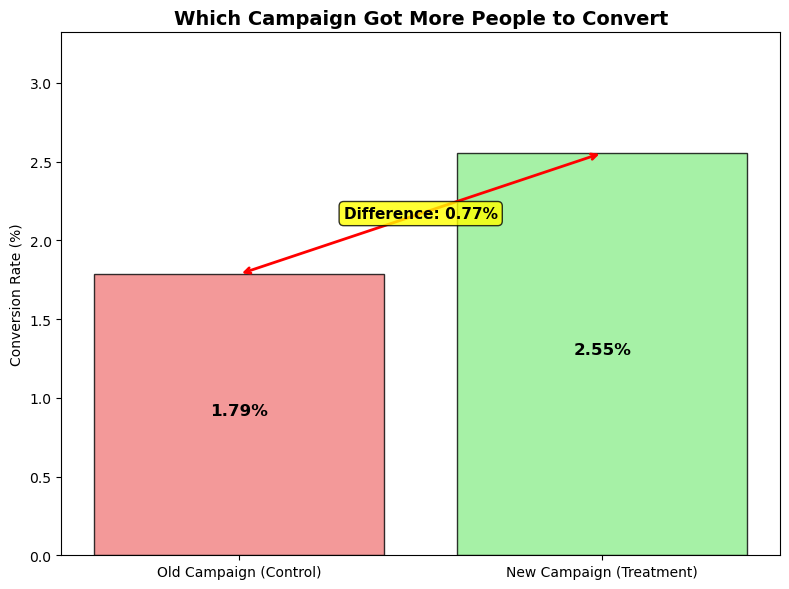

In [13]:
# 11. Visualizing Data

# Step 1: Calculate actual conversion rates
control_df = df[df['test group'] == 'psa']
treatment_df = df[df['test group'] == 'ad']

control_rate = control_df['converted'].mean()  
treatment_rate = treatment_df['converted'].mean()  

# Step 2: Prepare data for visualization
success_rates = [control_rate * 100, treatment_rate * 100]
campaigns = ['Old Campaign (Control)', 'New Campaign (Treatment)']
colors = ['lightcoral', 'lightgreen']

# Step 3: Plotting the Bar Chart
plt.figure(figsize=(8,6))
bars = plt.bar(campaigns, success_rates, color=colors, alpha=0.8, edgecolor='black')

# Step 4: Add percentage labels on bars
for bar, rate in zip(bars, success_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()*0.5,
             f'{rate:.2f}%', ha='center', fontsize=12, fontweight='bold')

# Step 5: Draw a red arrow showing the difference
difference = success_rates[1] - success_rates[0]
mid_x = (bars[0].get_x() + bars[0].get_width() + bars[1].get_x()) / 2
arrow_y = (success_rates[0] + success_rates[1]) / 2

plt.annotate('', xy=(bars[1].get_x() + bars[1].get_width()/2, success_rates[1]),
             xytext=(bars[0].get_x() + bars[0].get_width()/2, success_rates[0]),
             arrowprops=dict(arrowstyle='<->', color='red', lw=2))

# Step 6: Annotate the difference
plt.text(mid_x, arrow_y, f'Difference: {difference:.2f}%', 
         ha='center', va='center', fontsize=11, fontweight='bold', 
         bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

# Step 7: Final Chart Styling
plt.title("Which Campaign Got More People to Convert", fontsize=14, fontweight='bold')
plt.ylabel("Conversion Rate (%)")
plt.ylim(0, max(success_rates) * 1.3)
plt.tight_layout()
plt.show()


In [25]:
# 12. Revenue Impact

df['test group'].value_counts()

# Conversion Setup
n_A = df[df['test group'] == 'ad'].shape[0]
n_B = df[df['test group'] == 'psa'].shape[0]

conversions_A = df[(df['test group'] == 'ad') & (df['converted'] == 1)].shape[0]
conversions_B = df[(df['test group'] == 'psa') & (df['converted'] == 1)].shape[0]


p_A = conversions_A / n_A  
p_B = conversions_B / n_B 

success_A = int(n_A * p_A)
success_B = int(n_B * p_B)

# Revenue Calculation
conversion_value = 50
revenue_A = success_A * conversion_value
revenue_B = success_B * conversion_value

print(f" Estimated Revenue from Variant A: ${revenue_A}")
print(f" Estimated Revenue from Variant B: ${revenue_B}")




 Estimated Revenue from Variant A: $721150
 Estimated Revenue from Variant B: $21000


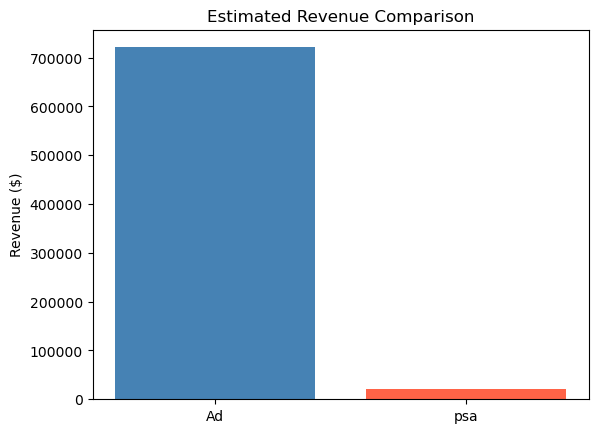

In [29]:

variants = ['Ad', 'psa']
revenues = [revenue_A, revenue_B]

plt.bar(variants, revenues, color=['steelblue', 'tomato'])
plt.title('Estimated Revenue Comparison')
plt.ylabel('Revenue ($)')
plt.show()


In [5]:
# 13. Ad Frequency Analysis
print("# Ad Frequency Analysis")
ad_frequency_analysis = df.groupby('total ads')['converted'].agg(['count', 'sum', 'mean']).round(4)
print(ad_frequency_analysis.head(10))

# Create frequency segments
df['ad_frequency_segment'] = pd.cut(df['total ads'], 
                                   bins=[0, 50, 150, 300, float('inf')], 
                                   labels=['Low', 'Medium', 'High', 'Very_High'])

freq_performance = df.groupby(['test group', 'ad_frequency_segment'])['converted'].mean().unstack().round(4)
print("\nConversion by frequency segment:")
print(freq_performance)

# Ad Frequency Analysis
           count  sum    mean
total ads                    
1          56606   89  0.0016
2          39827   94  0.0024
3          28661   81  0.0028
4          23426   84  0.0036
5          29303  101  0.0034
6          23409   74  0.0032
7          19095   98  0.0051
8          16037   78  0.0049
9          12546   81  0.0065
10         11865   78  0.0066

Conversion by frequency segment:
ad_frequency_segment     Low  Medium    High  Very_High
test group                                             
ad                    0.0111  0.1296  0.1626     0.1614
psa                   0.0093  0.0687  0.1351     0.1196


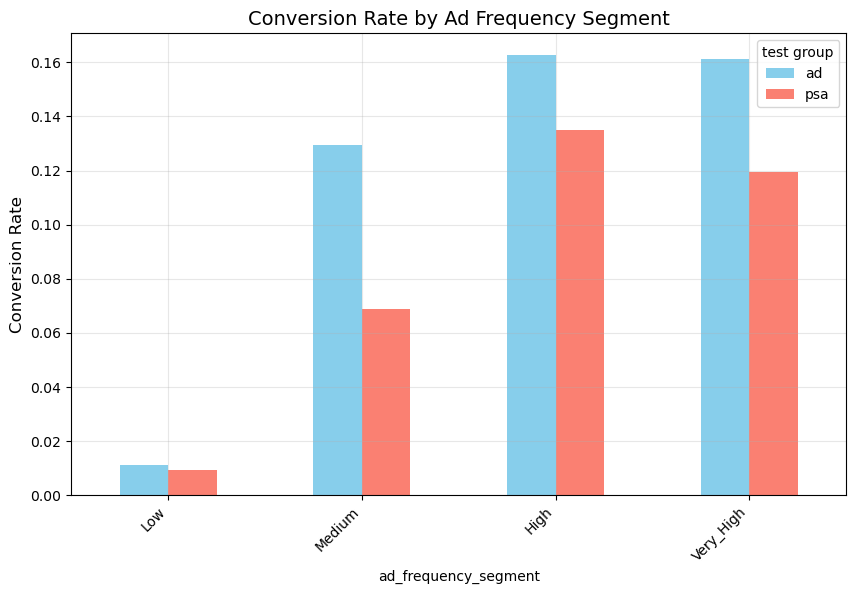

In [6]:
# 14. Plot frequency segments
import matplotlib.pyplot as plt
freq_performance.T.plot(kind='bar', figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Conversion Rate by Ad Frequency Segment', fontsize=14)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)


In [7]:
# 15. Conversion by day and test group
day_group_performance = df.groupby(['test group', 'most ads day'])['converted'].mean().unstack().round(4)
print("\nConversion by day and test group:")
print(day_group_performance)


Conversion by day and test group:
most ads day  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
test group                                                                  
ad            0.0225  0.0332    0.0213  0.0246    0.0216   0.0304     0.0254
psa           0.0163  0.0226    0.0140  0.0206    0.0202   0.0144     0.0158


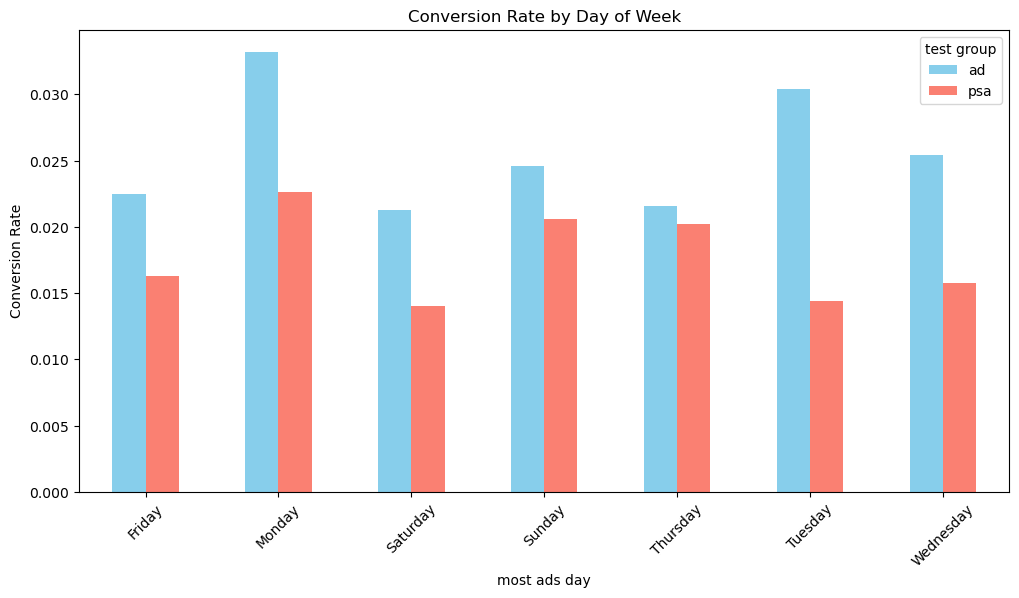

In [8]:
# 16. Plot day performance
day_group_performance.T.plot(kind='bar', figsize=(12,6), color=['skyblue', 'salmon'])
plt.title('Conversion Rate by Day of Week')
plt.ylabel('Conversion Rate') 
plt.xticks(rotation=45)
plt.show()


In [9]:
# 17. Hour Analysis
print("\n# Hour Analysis") 
hour_performance = df.groupby('most ads hour')['converted'].agg(['count', 'sum', 'mean']).round(4)
hour_performance.columns = ['Total Users', 'Conversions', 'Conversion_Rate']
print("Top 10 hours by conversion rate:")
print(hour_performance.sort_values('Conversion_Rate', ascending=False).head(10))

# Create time segments
df['time_segment'] = df['most ads hour'].apply(lambda x: 
    'Morning' if 6 <= x < 12 else
    'Afternoon' if 12 <= x < 17 else
    'Evening' if 17 <= x < 24 else 'Night')

time_performance = df.groupby(['test group', 'time_segment'])['converted'].mean().unstack().round(4)
print("\nConversion by time segment and test group:")
print(time_performance)


# Hour Analysis
Top 10 hours by conversion rate:
               Total Users  Conversions  Conversion_Rate
most ads hour                                           
16                   37567         1156           0.0308
20                   28923          862           0.0298
15                   44683         1325           0.0297
21                   29976          867           0.0289
17                   34988          987           0.0282
14                   45648         1281           0.0281
18                   32323          885           0.0274
19                   30352          811           0.0267
22                   26432          690           0.0261
13                   47655         1176           0.0247

Conversion by time segment and test group:
time_segment  Afternoon  Evening  Morning   Night
test group                                       
ad               0.0275   0.0276   0.0212  0.0135
psa              0.0201   0.0206   0.0126  0.0014


New column order (best -> worst): ['Evening', 'Afternoon', 'Morning', 'Night']

Reordered table:
 time_segment  Evening  Afternoon  Morning   Night
test group                                       
ad             0.0276     0.0275   0.0212  0.0135
psa            0.0206     0.0201   0.0126  0.0014


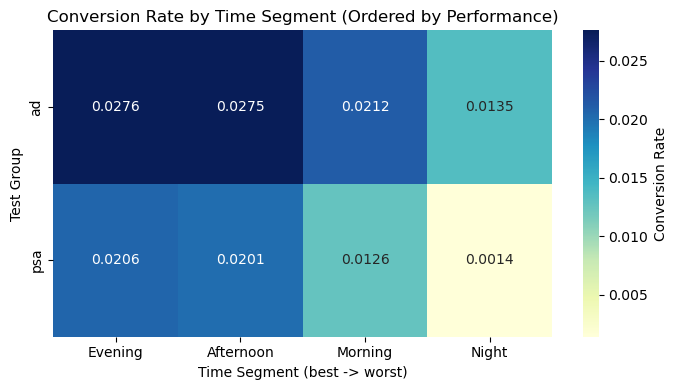

In [10]:
# 18. Plot hour analysis
import seaborn as sns

# 2) Compute order of segments by average conversion (highest -> lowest)
segment_order = time_performance.mean(axis=0).sort_values(ascending=False).index.tolist()
print("New column order (best -> worst):", segment_order)

# 3) Reorder explicitly using reindex (robust even if columns are categorical)
time_performance_reordered = time_performance.reindex(columns=segment_order)

# quick check (optional)
print("\nReordered table:\n", time_performance_reordered)

# 4) Plot heatmap of the reordered table
plt.figure(figsize=(7,4))
sns.heatmap(time_performance_reordered,
            annot=True, fmt=".4f",
            cmap="YlGnBu",
            cbar_kws={'label':'Conversion Rate'})
plt.title("Conversion Rate by Time Segment (Ordered by Performance)")
plt.ylabel("Test Group")
plt.xlabel("Time Segment (best -> worst)")
plt.tight_layout()
plt.show()


## Insights & Business Impact

1. **Ad campaign drives better results** – The Ad group achieved a significantly higher conversion rate than the PSA group, proving it is the more effective strategy.  
2. **Revenue uplift confirmed** – Projected revenue from the Ad campaign clearly surpasses PSA, making it the profitable option to scale.  
3. **Optimal frequency levels** – Conversions increase with exposure, but after the "High" frequency segment, performance flattens, indicating **diminishing returns**.  
4. **Best-performing time slots** – Evening and Afternoon windows consistently outperform Morning/Night. Running ads during these hours maximizes ROI.  
5. **Day-of-week insights** – Certain weekdays show stronger conversion rates like Monday followed up by Tuesday for ads); concentrating budgets on these days can improve efficiency.  
6. **Actionable Recommendation** – Invest more in the Ad campaign, apply **frequency caps**, and schedule ads in the **most profitable time slots and days** to maximize conversions and ROI. 